In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.models import Sequential

In [3]:
train=pd.read_csv("veriler\datathon\\train.csv")
sample=pd.read_csv("veriler\datathon\\sample_solution.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [83]:
len(test)

45504

In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   tarih                                 227520 non-null  float64
 1   fiyat                                 227520 non-null  float64
 2   kategori_et                           227520 non-null  uint8  
 3   kategori_kuruyemiş                    227520 non-null  uint8  
 4   kategori_meyve                        227520 non-null  uint8  
 5   kategori_sebze ve bakliyat            227520 non-null  uint8  
 6   kategori_süt ürünleri ve kahvaltılık  227520 non-null  uint8  
 7   kategori_tahıl ve ürünleri            227520 non-null  uint8  
dtypes: float64(2), uint8(6)
memory usage: 4.8 MB


In [258]:
test.tarih.unique()

array(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
       '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
       '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
      dtype=object)

In [23]:
train.shape

(227520, 8)

In [16]:
len(train)

227520

In [19]:
len(train.ürün.unique())

79

In [4]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [5]:
train.head(30)

,tarih,urun,besin,kategori,fiyat,uretimyeri,market,sehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A
5,2016-01-01,Bamya,42,sebze ve bakliyat,5.05,Yurt içi,M,A
6,2016-01-01,Barbunya-kuru,346,sebze ve bakliyat,5.97,Yurt içi,M,A
7,2016-01-01,Bezelye-taze,47,sebze ve bakliyat,12.19,Yurt içi,M,A
8,2016-01-01,Biber-yeşil,25,sebze ve bakliyat,12.15,Yurt içi,M,A
9,2016-01-01,Brüksel laha.,47,sebze ve bakliyat,23.53,Yurt içi,M,A


In [56]:
train.tarih.unique()

array(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
       '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
       '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
       '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
       '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
       '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
       '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
       '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
       '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
       '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
      dtype=object)

In [57]:
train.tarih.nunique()

60

In [26]:
train.urun.unique()

array(['kıyma', 'tavuk', 'hindi', 'Bakla-kuru', 'Bakla-taze', 'Bamya',
       'Barbunya-kuru', 'Bezelye-taze', 'Biber-yeşil', 'Brüksel laha.',
       'Domates', 'Enginar', 'Fasulye-kuru', 'Fasulye-taze', 'Havuç',
       'Salatalık', 'Ispanak', 'Kabak', 'Karnabahar', 'Kereviz-baş',
       'Kırmızı-pancar', 'Lahana', 'Mantar', 'Marul', 'Mercimek-kuru',
       'Nohut', 'Pancar', 'Patates', 'Patlıcan', 'Pazı', 'Pırasa',
       'Semizotu', 'Buğday ekmeği', 'Bulgur', 'Erişte', 'Makarna',
       'Mısır', 'Mısır unu', 'Nişasta', 'Pilav', 'Pirinç unu', 'Şehriye',
       'Tarhana', 'Yulaf unu', 'yumurta', 'beyaz peynir', 'Kaşar peyniri',
       'krema', 'yoğurt', 'sucuk', 'salam', 'sosis', 'tam buğday ekmek',
       'kaymak', 'bal', 'tereyağ', 'Armut', 'Çilek', 'Elma',
       'Erik türleri', 'İncir', 'Karadut', 'Karpuz', 'Kavun', 'Kayısı',
       'Kiraz', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Portakal', 'Şeftali',
       'Üzüm', 'Vişne', 'fındık', 'fıstık', 'kaju', 'badem', 'ceviz'],
      dtype=

In [32]:
train.urun.nunique()

79

In [63]:
len(test.ürün.unique())

79

In [37]:
train.urun.value_counts()

kıyma            2880
salam            2880
Çilek            2880
Armut            2880
tereyağ          2880
                 ... 
Nohut            2880
Mercimek-kuru    2880
Marul            2880
Mantar           2880
ceviz            2880
Name: urun, Length: 79, dtype: int64

In [27]:
train.besin.unique()

array([120, 103, 160, 354,  72,  42, 346,  47,  25,  63, 333,  35,   8,
        19,  38,  24,  16,  15, 351, 376,  83,  27,  52,  32, 247, 350,
       390, 353, 368, 329, 402, 100, 150, 170, 200,  90, 125, 250, 400,
       375,  57,  39,  60,  80,  93,  28,  54,  79,  17,  36,  77,  41,
        49,  74, 110, 115], dtype=int64)

In [33]:
train.besin.nunique()

56

In [38]:
train.besin.value_counts()

42     11520
25     11520
120     8640
353     8640
24      8640
390     8640
57      5760
52      5760
350     5760
351     5760
47      5760
125     5760
90      5760
100     5760
110     5760
39      2880
400     2880
375     2880
250     2880
93      2880
60      2880
80      2880
170     2880
28      2880
54      2880
79      2880
17      2880
36      2880
77      2880
41      2880
49      2880
74      2880
200     2880
368     2880
150     2880
402     2880
160     2880
354     2880
72      2880
346     2880
63      2880
333     2880
35      2880
8       2880
19      2880
38      2880
16      2880
15      2880
376     2880
83      2880
27      2880
32      2880
247     2880
103     2880
329     2880
115     2880
Name: besin, dtype: int64

In [28]:
train.kategori.unique()

array(['et', 'sebze ve bakliyat', 'tahıl ve ürünleri',
       'süt ürünleri ve kahvaltılık', 'meyve', 'kuruyemiş'], dtype=object)

In [34]:
train.kategori.nunique()

6

In [39]:
train.kategori.unique()

sebze ve bakliyat              83520
meyve                          51840
tahıl ve ürünleri              34560
süt ürünleri ve kahvaltılık    34560
kuruyemiş                      14400
et                              8640
Name: kategori, dtype: int64

In [95]:
train.uretimyeri.unique()

array(['Yurt içi', 'Yurt dışı'], dtype=object)

In [41]:
train.uretimyeri.value_counts()

Yurt içi     113760
Yurt dışı    113760
Name: uretimyeri, dtype: int64

In [30]:
train.market.unique()

array(['M', 'C', 'B'], dtype=object)

In [42]:
train.market.value_counts()

M    75840
C    75840
B    75840
Name: market, dtype: int64

In [31]:
train.sehir.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [43]:
train.sehir.value_counts()

A    28440
B    28440
C    28440
D    28440
E    28440
F    28440
G    28440
H    28440
Name: sehir, dtype: int64

In [35]:
train.describe()

,besin,fiyat
count,227520.000000,227520.000000
mean,143.113924,16.348622
std,133.218871,13.260935
min,8.000000,0.730000
25%,41.000000,7.330000
50%,83.000000,12.600000
75%,250.000000,20.900000
max,402.000000,141.330000


In [254]:
train.corr()["fiyat"]

besin              0.017858
fiyat              1.000000
urun_Armut        -0.074353
urun_Bakla-kuru   -0.024674
urun_Bakla-taze    0.076012
                     ...   
sehir_D           -0.001031
sehir_E           -0.001160
sehir_F           -0.000298
sehir_G           -0.001043
sehir_H           -0.000195
Name: fiyat, Length: 100, dtype: float64

In [46]:
train.isnull().sum()

tarih         0
urun          0
besin         0
kategori      0
fiyat         0
uretimyeri    0
market        0
sehir         0
dtype: int64

In [58]:
train.head()

,tarih,urun,besin,kategori,fiyat,uretimyeri,market,sehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [77]:
kiyma2=train.urun.isin(["kıyma"])
kiyma2=train[kiyma2]

In [79]:
kiyma2.head(-5)

,tarih,urun,besin,kategori,fiyat,uretimyeri,market,sehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
79,2016-01-01,kıyma,120,et,33.71,Yurt dışı,M,A
158,2016-01-01,kıyma,120,et,33.95,Yurt içi,C,A
237,2016-01-01,kıyma,120,et,32.88,Yurt dışı,C,A
316,2016-01-01,kıyma,120,et,33.53,Yurt içi,B,A
...,...,...,...,...,...,...,...,...
226730,2020-12-01,kıyma,120,et,112.47,Yurt içi,C,G
226809,2020-12-01,kıyma,120,et,117.16,Yurt dışı,C,G
226888,2020-12-01,kıyma,120,et,104.47,Yurt içi,B,G
226967,2020-12-01,kıyma,120,et,115.13,Yurt dışı,B,G


In [82]:
kiyma2.besin.unique()

array([120], dtype=int64)

In [6]:
one_hot = pd.get_dummies(train[['urun','kategori','uretimyeri','market','sehir']])
train = train.drop(['urun','kategori','uretimyeri','market','sehir'],axis = 1)
train = train.join(one_hot)

In [224]:
one_hot = pd.get_dummies(train[['kategori']])
train = train.drop(['urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)
train = train.join(one_hot)

In [7]:
train = train.drop(['besin'],axis = 1)

In [8]:
train.head()

,tarih,fiyat,urun_Armut,urun_Bakla-kuru,urun_Bakla-taze,urun_Bamya,urun_Barbunya-kuru,urun_Bezelye-taze,urun_Biber-yeşil,urun_Brüksel laha.,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
0,2016-01-01,33.41,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,2016-01-01,11.22,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,2016-01-01,11.12,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,2016-01-01,7.02,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,2016-01-01,13.14,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [9]:
train["tarih"]=train["tarih"].str.replace("-","").astype(float)

In [10]:
y=train.iloc[:,1:2]
x = train.drop(['fiyat'],axis = 1)

In [11]:
y.head()

,fiyat
0,33.41
1,11.22
2,11.12
3,7.02
4,13.14


In [12]:
x.head()

,tarih,urun_Armut,urun_Bakla-kuru,urun_Bakla-taze,urun_Bamya,urun_Barbunya-kuru,urun_Bezelye-taze,urun_Biber-yeşil,urun_Brüksel laha.,urun_Bulgur,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
0,20160101.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,20160101.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,20160101.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,20160101.0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,20160101.0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [14]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
model=Sequential()
model.add(Dense(8,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(1))

In [16]:
#opt=tf.keras.optimizers.Adam(learning_rate=0.007999999821186066, beta_1=0.9, beta_2=0.999, epsilon=0.0026666000485420227, amsgrad=True)
model.compile(optimizer="Adam",loss="mse")

In [17]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
4288/4288 [==============================] - 28s 6ms/step - loss: 23.3693 - val_loss: 4.4837
Epoch 2/10
4288/4288 [==============================] - 38s 9ms/step - loss: 4.3542 - val_loss: 4.4737
Epoch 3/10
4288/4288 [==============================] - 34s 8ms/step - loss: 4.2239 - val_loss: 4.0374
Epoch 4/10
4288/4288 [==============================] - 35s 8ms/step - loss: 4.2096 - val_loss: 3.9264
Epoch 5/10
4288/4288 [==============================] - 34s 8ms/step - loss: 4.2392 - val_loss: 4.0126
Epoch 6/10
4288/4288 [==============================] - 51s 12ms/step - loss: 4.1855 - val_loss: 4.0177
Epoch 7/10
4288/4288 [==============================] - 32s 7ms/step - loss: 4.1837 - val_loss: 3.9422
Epoch 8/10
4288/4288 [==============================] - 32s 7ms/step - loss: 4.1231 - val_loss: 4.0696
Epoch 9/10
4288/4288 [==============================] - 32s 7ms/step - loss: 4.1492 - val_loss: 4.1742
Epoch 10/10
4288/4288 [==============================] - 33s 8ms/step -

<AxesSubplot:>

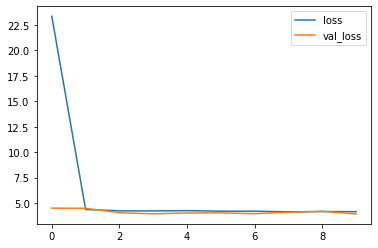

In [18]:
history=pd.DataFrame(model.history.history)
history.plot()

In [19]:
model.evaluate(x_test,y_test)

2347/2347 [==============================] - 7s 3ms/step - loss: 3.9291


3.929105758666992

In [20]:
testTahminleri=model.predict(x_test)
len(testTahminleri)

75082

In [21]:
print(x_test[0])
print(testTahminleri[0])

[0.243309 0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       1.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       1.       1.       0.
 1.       0.       0.       1.       0.       0.       0.       0.
 0.       0.       0.      ]
[16.319763]


In [22]:
tahmin=pd.DataFrame(y_test.values)
testTahminleri= pd.Series(testTahminleri.reshape(75082,))
tahminDf=pd.concat([tahmin,testTahminleri],axis=1)
tahminDf.columns=["Gerçek Değer","Test Sonucu"]

In [23]:
tahminDf.head(20)

,Gerçek Değer,Test Sonucu
0,14.76,16.319763
1,6.19,6.440044
2,38.22,41.036083
3,9.84,9.243193
4,7.64,6.965960
5,27.07,25.036230
6,20.08,22.202391
7,19.69,20.439573
8,12.82,13.533752
9,19.25,17.899443


In [47]:
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [48]:
sutunisimler=["id","tarih","urun","besin","kategori","uretimyeri","market","sehir"]
test.columns=sutunisimler

In [49]:
one_hot = pd.get_dummies(test[['urun','kategori','uretimyeri','market','sehir']])
test = test.drop(["id",'urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)
test = test.join(one_hot)

In [59]:
test.head()

,tarih,urun_Armut,urun_Bakla-kuru,urun_Bakla-taze,urun_Bamya,urun_Barbunya-kuru,urun_Bezelye-taze,urun_Biber-yeşil,urun_Brüksel laha.,urun_Bulgur,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
0,20210101.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,20210101.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,20210101.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,20210101.0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,20210101.0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [51]:
test["tarih"]=test["tarih"].str.replace("-","").astype(float)

In [56]:
testTahminleri=model.predict(test)
len(testTahminleri)

45504

In [57]:
testTahminleri= pd.Series(testTahminleri.reshape(45504,))
tahminDf=pd.concat([testTahminleri],axis=1)
tahminDf.columns=["Test Sonucu"]

In [58]:
tahminDf.head(20)

,Test Sonucu
0,1.319474e+09
1,1.319474e+09
2,1.319474e+09
3,1.319474e+09
4,1.319474e+09
5,1.319474e+09
6,1.319474e+09
7,1.319474e+09
8,1.319474e+09
9,1.319474e+09
